# Initial Tests of Assumed Shapes Model

For the first tests will test the model against the case in which there is no FWTD

In [2]:
from FwtModels import AssumedShape
import numpy as np
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import y,x,t
import pandas as pd

## Create the Symbolic Model & show it is equivelent to that in the book

Within Jonathans book (section 11.6) the following equation is 'derived' for a rectangluar wing with one mode in both bending and torsion

$m\left[\begin{array}{cc}{\frac{c s^{5}}{5}} & {\frac{s^{4}}{4}\left(\frac{c^{2}}{2}-c x_{\mathrm{f}}\right)} \\ {\frac{s^{4}}{4}\left(\frac{c^{2}}{2}-c x_{\mathrm{f}}\right)} & {\frac{s^{3}}{3}\left(\frac{c^{3}}{3}-c^{2} x_{\mathrm{f}}+c x_{\mathrm{f}}^{2}\right)}\end{array}\right]\left\{\begin{array}{c}{\dot{q}_{1}} \\ {\ddot{q}_{2}}\end{array}\right\}+\rho V\left[\begin{array}{cc}{\frac{c a_{\mathrm{WS}} 5}{10}} & {0} \\ {-\frac{c^{2} e a_{\mathrm{WS}}^{4}}{8}} & {-\frac{c^{3} s^{3} M_{\theta}}{24}}\end{array}\right]\left\{\begin{array}{c}{\dot{q}_{1}} \\ {\dot{q}_{2}}\end{array}\right\}+\left(\rho V^{2}\left[\begin{array}{cc}{0} & {\frac{c s^{4} a_{\mathrm{W}}}{8}} \\ {0} & {-\frac{e c^{2} s^{3} a_{W}}{6}}\end{array}\right]+\left[\begin{array}{cc}{4 E I s} & {0} \\ {0} & {G J s}\end{array}\right]\right)\left\{\begin{array}{l}{q_{1}} \\ {q_{2}}\end{array}\right\}=\left\{\begin{array}{l}{0} \\ {0}\end{array}\right\}$

Which is the explict version of this equation

$A \ddot{q}+(\rho v \mathbf{B}+\mathbf{D}) \dot{q}+\left(\rho v^{2} \mathbf{C}+\mathbf{E}\right) \boldsymbol{q}=0$

This is slightly different to I I have formulated the equations as my equation was

$\mathbf{A} \ddot{q}+\mathbf{K} q=\mathbf{B} \dot{q} + \mathbf{C} \dot{q}$

Which leads to:

$\mathbf{A} \ddot{q} - \mathbf{B} \dot{q}  +(\mathbf{K}-\mathbf{C}) q=0$

This section will aim to recreat each of these equations from my generalised model by setting the FWTD's size to 0

First, need to generate a symbolic model for the generalised case

In [18]:
# create generalised coordinates
q0,q1,q2 = me.dynamicsymbols('q:3')
q = sym.Matrix([q0,q1,q2])

# create instance of Fwt parameters
p = AssumedShape.FwtParameters()

# define shape Functions
z_w = q0*y**2 + q1*(x-p.x_f)*y
alpha_w = q1 * y
z_t = z_w.subs(y,p.s_w) + q2*(y)
alpha_t = alpha_w.subs(y,p.s_w) + q2*sym.sin(p.Lambda)

# create the model
sModel = AssumedShape.SymbolicModel(q,z_w,alpha_w,z_t,alpha_t,p)
sModel.GenerateEoM()

for each matrix set $s_t$ to zero and print the result to compare with the original equation

In [20]:
# Damping Matrix, divide by M_t as this is outside the matrix above
(-sModel.B.subs(p.s_t,0))/(p.rho*p.V)

⎡          5                  ⎤
⎢-a_w⋅c⋅s_w                   ⎥
⎢────────────        0       0⎥
⎢     10                      ⎥
⎢                             ⎥
⎢     2      4       3    3   ⎥
⎢a_w⋅c ⋅e⋅s_w   M_α̇⋅c ⋅s_w    ⎥
⎢─────────────  ───────────  0⎥
⎢      8             24       ⎥
⎢                             ⎥
⎣      0             0       0⎦

In [6]:
# Mass Matrix, divide by rho*V as this is outside the matrix above
sym.simplify((sModel.M/p.m_w).subs(p.s_t,0))

⎡           5                   4                     ⎤
⎢      c⋅s_w               c⋅s_w ⋅(c - 2⋅x_f)         ⎥
⎢      ──────              ──────────────────        0⎥
⎢        5                         8                  ⎥
⎢                                                     ⎥
⎢     4                   3 ⎛ 2                  2⎞   ⎥
⎢c⋅s_w ⋅(c - 2⋅x_f)  c⋅s_w ⋅⎝c  - 3⋅c⋅x_f + 3⋅x_f ⎠   ⎥
⎢──────────────────  ──────────────────────────────  0⎥
⎢        8                         9                  ⎥
⎢                                                     ⎥
⎣        0                         0                 0⎦

In [7]:
# Aero Stiffness Matrix, divide by rho*V^2 as this is outside the matrix above
(-sModel.C.subs(p.s_t,0))/(p.rho*p.V**2)

⎡              4      ⎤
⎢     a_w⋅c⋅s_w       ⎥
⎢0    ──────────     0⎥
⎢         8           ⎥
⎢                     ⎥
⎢         2      3    ⎥
⎢   -a_w⋅c ⋅e⋅s_w     ⎥
⎢0  ───────────────  0⎥
⎢          6          ⎥
⎢                     ⎥
⎣0         0         0⎦

In [8]:
# Structural Stiffness Matrix
(sModel.K.subs({p.s_t:0, p.k_theta:0}))

⎡4⋅EI⋅s_w    0     0⎤
⎢                   ⎥
⎢   0      GJ⋅s_w  0⎥
⎢                   ⎥
⎣   0        0     0⎦

Inspection shows all of these matrices are the same as that from the book with the exception of the aero samping matrix (bottum left reads a_w^4*s in the book which is a mistake as no mechanism in the maths coan really raise a_w to the power of anything)

## Test a couple of Numeric Models

### Compare Frequency values for a SDoF system

with Jonathan's book, in section 3.2.1, a model is built of a continous wing with a single assumed shape:

$z(y, t)=\psi(y) q(t)=\left(\frac{y}{s}\right)^{2} q(t)$

The natural frequency of this system is found to be $\omega=4.47 \sqrt{\frac{E I}{\mu s^{4}}}$ and the exact answer is shown as $\omega=3.516 \sqrt{\frac{E I}{\mu s^{4}}}$

#### Compare model with the answer for one assumed shape in bending

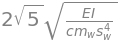

In [10]:
# create generalised coordinates
q0 = me.dynamicsymbols('q0') 
q = sym.Matrix([q0])

# create instance of Fwt parameters
p = AssumedShape.FwtParameters()
p.ThetaLocked = True

# define shape Functions
z_w = q0*y**2
alpha_w = sym.Rational(0,1)

# FWT is locked so is parrallel to the end of the main wing
z_t = z_w.subs(y,p.s_w) + z_w.diff(t).subs(y,p.s_w)*y
alpha_t = alpha_w.subs(y,p.s_w)

# create the model
sModel = AssumedShape.SymbolicModel(q,z_w,alpha_w,z_t,alpha_t,p)
sModel.GenerateEoM()

eSet = (sModel.M**-1*sModel.K).eigenvals()
eVal = sym.sqrt(((eSet.popitem())[0]).subs({p.k_theta:0,p.s_t:0}))
eVal

#### What about 2 shapes for bending

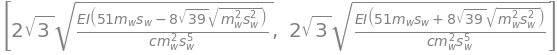

In [11]:
# create generalised coordinates
q0,q1 = me.dynamicsymbols('q0,q1') 
q = sym.Matrix([q0,q1])

# create instance of Fwt parameters
p = AssumedShape.FwtParameters()
p.ThetaLocked = True

# define shape Functions
z_w = q0*y**2+q1*y**3
alpha_w = sym.Rational(0,1)

# FWT is locked so is parrallel to the end of the main wing
z_t = z_w.subs(y,p.s_w) + z_w.diff(t).subs(y,p.s_w)*y
alpha_t = alpha_w.subs(y,p.s_w)

# create the model
sModel = AssumedShape.SymbolicModel(q,z_w,alpha_w,z_t,alpha_t,p)
sModel.GenerateEoM()



eSet = (sModel.M**-1*sModel.K).eigenvals()
freqs = []
for key,value in eSet.items():
    freqs.append(sym.simplify(sym.sqrt(key.subs({p.k_theta:0,p.s_t:0}))))
freqs

#eVal = sym.sqrt(((eSet.popitem())[0]).subs({p.k_theta:0,p.s_t:0}))
#eVal

Thats getting more complicated and doesnt really simplify well. So lets swap to numerical analysis.


If we set $E,I,m_w,s_w,c$ to 1 the frequecy of the lowest mode shape should start at 4.47 and tend to 3.516

In [13]:
# create generalised coordinates
q0,q1,q2 = me.dynamicsymbols('q:3') 
q = sym.Matrix([q0,q1,q2])

# create instance of Fwt parameters
p = AssumedShape.FwtParameters()
p.ThetaLocked = True
p.EI.value = 1
p.m_w.value = 1
p.s_w.value = 1
p.c.value = 1


# created assumed shapes for ever higher order models then create a numerical model and find the minimium modal frequency
Freqs = []
Vecs = []
for i in np.arange(0,3):
    # define shape Functions
    z_w = sym.Rational(0,1)
    for j in np.arange(0,i+1):
        z_w = z_w + q[j]*y**(2+j)

    alpha_w = sym.Rational(0,1)

    # FWT is locked so is parrallel to the end of the main wing
    z_t = z_w.subs(y,p.s_w) + z_w.diff(t).subs(y,p.s_w)*y
    alpha_t = alpha_w.subs(y,p.s_w)

    # create the model
    sModel = AssumedShape.SymbolicModel(q,z_w,alpha_w,z_t,alpha_t,p)
    sModel.GenerateEoM()

    nModel = sModel.createNumericInstance()

    eVals,eVecs = nModel.FreeVibrationVals()
    freqs=[]
    vecs=[]
    for i in np.arange(0,len(eVals)):
        if ~np.isnan(eVals[i]):
            freqs.append(np.sqrt(eVals[i]))
            vecs.append(eVecs[i])
        ind = np.argmin(freqs)
    Freqs.append(freqs[ind])
    Vecs.append(vecs[ind])

In [17]:
# create a data frame to present the natural frequencies, there error from the actual answer, and mode shapes in
index = ['One Shape','Two Shapes','Three Shapes']

df = pd.DataFrame(np.real(Freqs),index,['Freq'])
pd.options.display.float_format = '{:,.2f}'.format
df['% Error'] = ((df['Freq'] / 3.516) -1)*100
cats = []
for i in np.arange(0,3):
    cats.append(f'Mode Comp {i}')

df2 = pd.DataFrame(np.array(Vecs),index,cats)
ShapeDf = pd.concat([df,df2],axis=1)
ShapeDf
sModel.M

⎡     4                           5                           6               
⎢c⋅s_w ⋅(5⋅mₜ⋅sₜ + m_w⋅s_w)  c⋅s_w ⋅(6⋅mₜ⋅sₜ + m_w⋅s_w)  c⋅s_w ⋅(7⋅mₜ⋅sₜ + m_w
⎢──────────────────────────  ──────────────────────────  ─────────────────────
⎢            5                           6                           7        
⎢                                                                             
⎢     5                           6                           7               
⎢c⋅s_w ⋅(6⋅mₜ⋅sₜ + m_w⋅s_w)  c⋅s_w ⋅(7⋅mₜ⋅sₜ + m_w⋅s_w)  c⋅s_w ⋅(8⋅mₜ⋅sₜ + m_w
⎢──────────────────────────  ──────────────────────────  ─────────────────────
⎢            6                           7                           8        
⎢                                                                             
⎢     6                           7                           8               
⎢c⋅s_w ⋅(7⋅mₜ⋅sₜ + m_w⋅s_w)  c⋅s_w ⋅(8⋅mₜ⋅sₜ + m_w⋅s_w)  c⋅s_w ⋅(9⋅mₜ⋅sₜ + m_w
⎢──────────────────────────  ───────────────────────

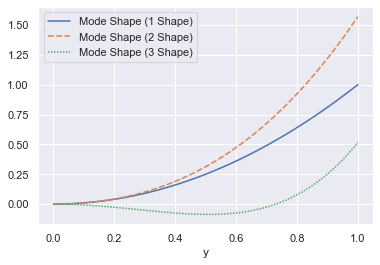

In [15]:
# plot mode shapes
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# make a data frame to calulaate the positon at each y station
ModeDf = pd.DataFrame()
ModeDf['y'] = np.linspace(0,1,100)

# make a new series for each MOde shape to show as a combination of the values in ShapeDf
for i in np.arange(0,3):
    ModeDf[f'Mode Shape ({i+1} Shape)'] = ModeDf['y'] **2 * ShapeDf['Mode Comp 0'][i] + ModeDf['y'] **3 * ShapeDf['Mode Comp 1'][i] + ModeDf['y'] **4 * ShapeDf['Mode Comp 2'][i]

# set the index of the data frame
ModeDf = ModeDf.set_index('y')

# ensure the end of the beam is deflecting up
cols = list(ModeDf)
for i in range(0,len(cols)):
    if ModeDf[cols[i]].iloc[-1] < 0:
        ModeDf[cols[i]] = ModeDf[cols[i]]*-1

sns.lineplot(data = ModeDf)
